# PIMA Dibates Dataset Prediction:-

# Importing Libraies:

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [258]:
data = pd.read_csv('diabetes.csv')

In [259]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [260]:
print('no of rows in dataset:',data.shape[0])
print('no of columns in dataset:',data.shape[1])
print("no of features in dataset:",data.columns.tolist())

no of rows in dataset: 768
no of columns in dataset: 10
no of features in dataset: ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'skin', 'diabetes']


# Checking The Null Values

In [261]:
data.isnull().values.any()

False

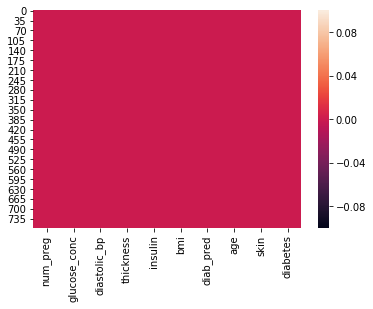

In [262]:
sns.heatmap(data.isnull())

# Feature Engineering

In [263]:
diabetes_map = {True: 1,False: 0}

In [264]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [265]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [266]:
data.groupby("diabetes").size()

diabetes
0    500
1    268
dtype: int64

In [267]:
data.apply(lambda x:len(x.value_counts()))

num_preg         17
glucose_conc    136
diastolic_bp     47
thickness        51
insulin         186
bmi             248
diab_pred       517
age              52
skin             51
diabetes          2
dtype: int64

In [268]:
# Replacing Zeros Values in each record:
data.loc[:, 'glucose_conc'].replace([0], [data['glucose_conc'].mean()], inplace=True)
data.loc[:, 'num_preg'].replace([0], [data['num_preg'].mean()], inplace=True)
data.loc[:, 'diastolic_bp'].replace([0], [data['diastolic_bp'].mean()], inplace=True)
data.loc[:, 'thickness'].replace([0], [data['thickness'].mean()], inplace=True)
data.loc[:, 'insulin'].replace([0], [data['insulin'].mean()], inplace=True)
data.loc[:, 'diab_pred'].replace([0], [data['diab_pred'].mean()], inplace=True)
data.loc[:, 'age'].replace([0], [data['age'].mean()], inplace=True)
data.loc[:, 'skin'].replace([0], [data['skin'].mean()], inplace=True)

# Exploratory Data Analysis:

1.Multivariate Analysis.

2.Univariate Analysis

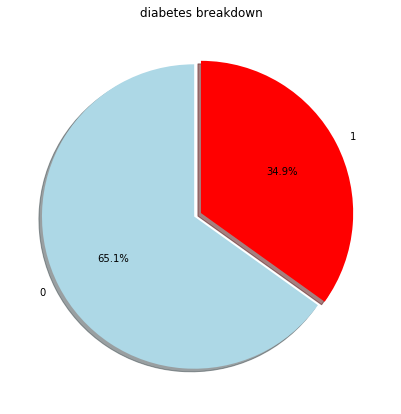

In [269]:
# univariate Analysis: checking diabetes breakdown:
from pylab import rcParams
labels = data['diabetes'].value_counts(sort = True).index
sizes = data['diabetes'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)

rcParams['figure.figsize'] = 7,7
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('diabetes breakdown')
plt.show()

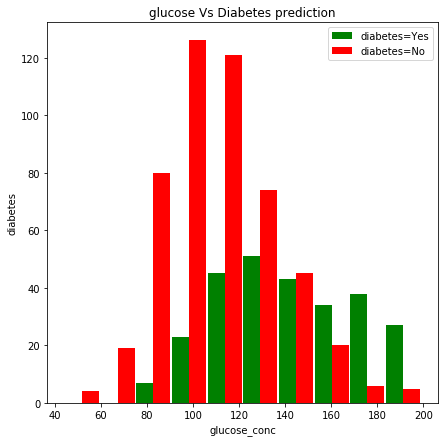

In [270]:
# Multivariate Analysis Glusose VS Diabetes Prediction
glucose_dibetes_yes = data.loc[data['diabetes'] == 1].glucose_conc
glucose_dibetes_No = data.loc[data['diabetes'] == 0].glucose_conc
plt.xlabel("glucose_conc")
plt.ylabel("diabetes")
plt.title("glucose Vs Diabetes prediction")
plt.hist([glucose_dibetes_yes, glucose_dibetes_No], rwidth=0.95, color=['green','red'],label=['diabetes=Yes','diabetes=No'])
plt.legend()

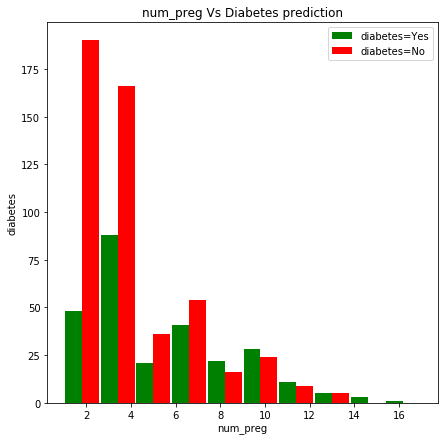

In [271]:
# Multivariate Analysis num_preg Vs Diabetes prediction
num_preg_yes = data.loc[data['diabetes'] == 1].num_preg
num_preg_No = data.loc[data['diabetes'] == 0].num_preg
plt.xlabel("num_preg")
plt.ylabel("diabetes")
plt.title("num_preg Vs Diabetes prediction")
plt.hist([num_preg_yes, num_preg_No], rwidth=0.95, color=['green','red'],label=['diabetes=Yes','diabetes=No'])
plt.legend()

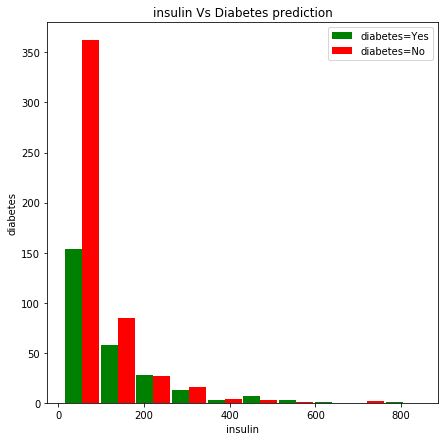

In [272]:
# Multivariate Analysis insulin Vs Diabetes prediction
insulin_yes = data.loc[data['diabetes'] == 1].insulin
insulin_No = data.loc[data['diabetes'] == 0].insulin
plt.xlabel("insulin")
plt.ylabel("diabetes")
plt.title("insulin Vs Diabetes prediction")
plt.hist([insulin_yes, insulin_No], rwidth=0.95, color=['green','red'],label=['diabetes=Yes','diabetes=No'])
plt.legend()

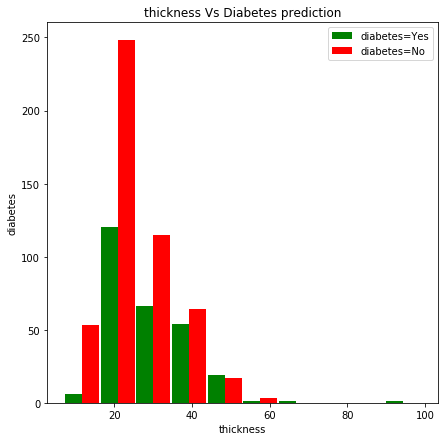

In [273]:
# Multivarite Analysis thickness Vs Diabetes prediction
thickness_yes = data.loc[data['diabetes'] == 1].thickness
thickness_No = data.loc[data['diabetes'] == 0].thickness
plt.xlabel("thickness")
plt.ylabel("diabetes")
plt.title("thickness Vs Diabetes prediction")
plt.hist([thickness_yes, thickness_No], rwidth=0.95, color=['green','red'],label=['diabetes=Yes','diabetes=No'])
plt.legend()

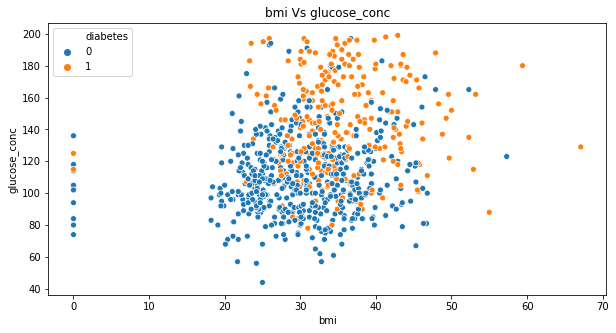

In [274]:
# Multivarite Analysis Checking impact of bmi Vs glucose_conc on diabates prediction
plt.figure(figsize=(10,5))
plt.xlabel("bmi")
plt.ylabel("glucose_conc")
plt.title("bmi Vs glucose_conc")
sns.scatterplot(x='bmi',y='glucose_conc',hue='diabetes',data=data)

# Checking Outliers in Dataset:

In [275]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,1.048295,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.379471,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.275800,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.809136,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000


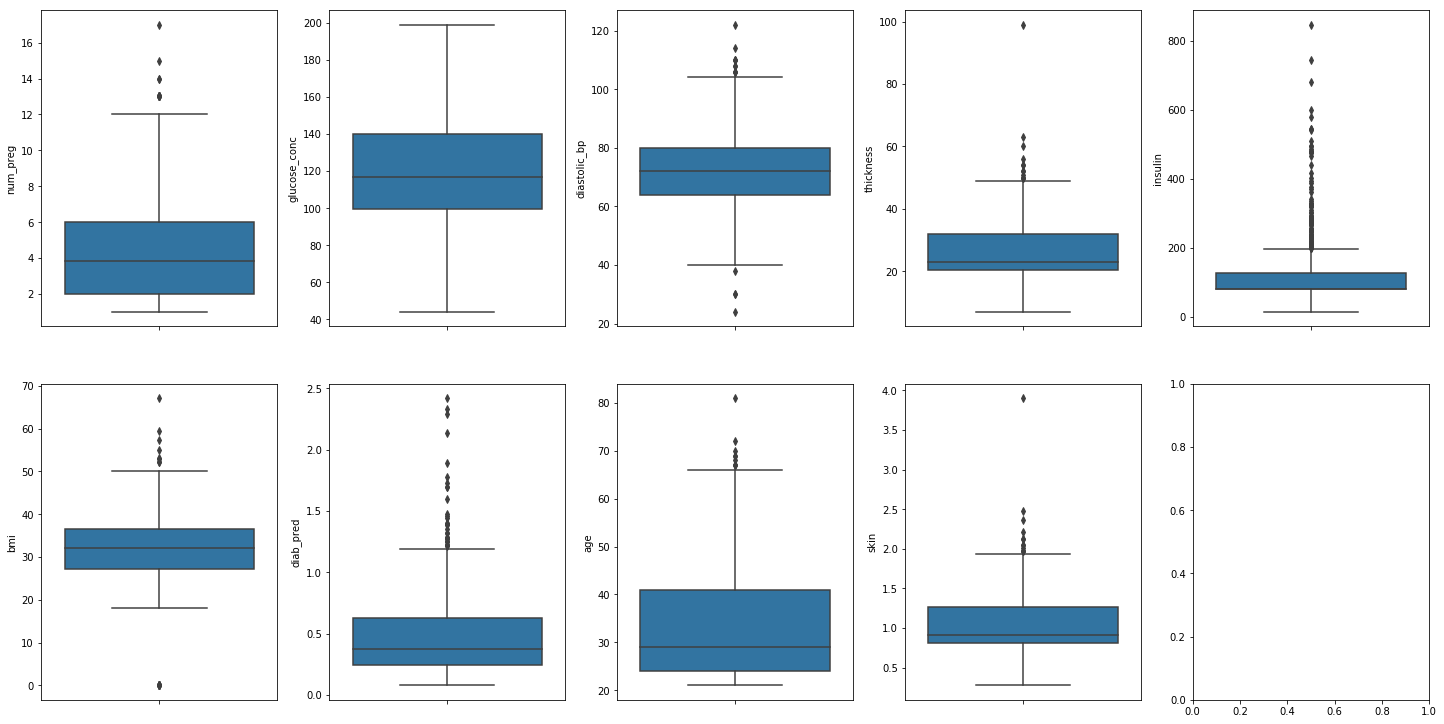

In [276]:
# create box plots
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in data.items():
    if col != 'diabetes':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [277]:
# Removing the outliers by using Zscore Method:
from scipy.stats import zscore
zscore = abs(zscore(data))
print(data.shape)
data_final = data.loc[(zscore<3).all(axis=1)]
print(data_final.shape)

(768, 10)
(709, 10)


In [278]:
data = data_final

# Checking wheather all the variables following normal Distribution:

num_preg        0.934162
glucose_conc    0.568485
diastolic_bp    0.168094
thickness       0.702672
insulin         2.034278
bmi             0.329346
diab_pred       1.183750
age             1.062581
skin            0.702672
diabetes        0.684012
dtype: float64


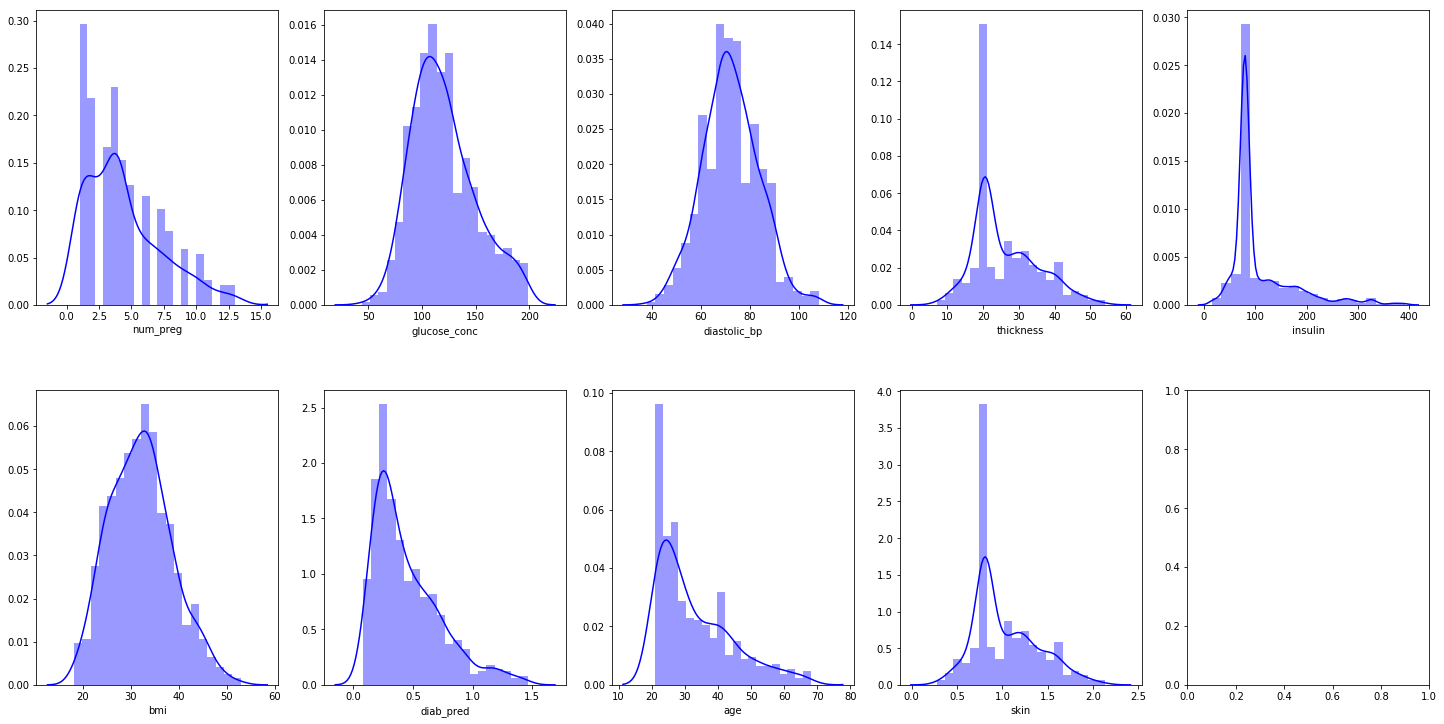

In [279]:
# create distribution plots
print(data.skew())
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in data.items():
    if col != 'diabetes':
        sns.distplot(value, ax=ax[index],bins=20,color='blue')
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Selecting Dependant and Independant Variable:

In [280]:
X = data.drop('diabetes',axis=1)
y = data['diabetes']
print(X.shape)
print(y.shape)

(709, 9)
(709,)


In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Implementing Algorithim For Prediction

In [282]:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    print("Accuracy Score of model is:",model.score(X_test,y_test))
    score = cross_val_score(model,X,y,cv=5)
    print("Cross validation is",np.mean(score)*100)

In [283]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy Score of model is: 0.7605633802816901
Cross validation is 76.02836879432624


In [284]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.6830985915492958
Cross validation is 69.53051643192488


In [285]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.7253521126760564
Cross validation is 72.49325741684147


In [286]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.7605633802816901
Cross validation is 75.17630606333034


 As Random Forest Classifier is giving Max Accuracy Lets Implement it:

In [293]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [294]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [295]:
# Create Hyperparametre tuning
param_grid = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
              'criterion':['gini','entropy'],
              'bootstrap':[True,False],
              'min_samples_leaf':randint(1,4)}

In [296]:
random_grid = RandomizedSearchCV(classifier,param_distributions= param_grid,cv=9,scoring='f1',n_jobs=-1)

In [297]:
random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000216577F24A8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002165E7C2FD0>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   scoring='f1')

In [298]:
random_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 3,
 'n_estimators': 100}

accuracy_score: 0.7746478873239436
[[73 17]
 [15 37]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        90
           1       0.69      0.71      0.70        52

    accuracy                           0.77       142
   macro avg       0.76      0.76      0.76       142
weighted avg       0.78      0.77      0.78       142



Text(0.5, 76.01999999999997, 'Predicted label')

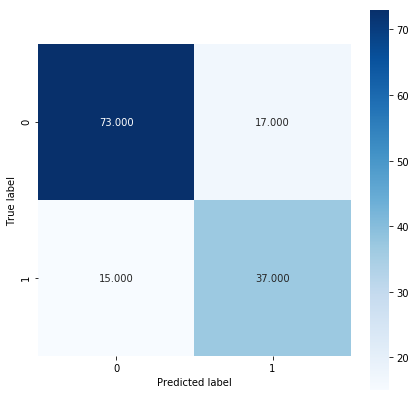

In [300]:
classifier = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=10,max_features=2,min_samples_leaf=3,n_estimators=100)
classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Saving Best Model

In [304]:
import joblib
joblib.dump(classifier,'classifier.obj')
classifier_from_joblib = joblib.load('classifier.obj')
classifier_from_joblib.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)